In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

#### Creating the full dataset

In [23]:
def assign_label(x):
    if x.length < 15:
        if x.width < 10:
            if x.height < 5:
                return 'A'
            else:
                return 'B'
        else:
            return 'C'
    else:
        if x.width < 10:
            return 'A'
        elif x.height < 5:
            return 'C'
        else:
            return 'B'

In [24]:
def create_dataset(sample_num):
    np.random.seed(42)
    df = pd.DataFrame(columns = ['length', 'width', 'height'])
    df['length'] = np.random.randint(1, 30, sample_num)
    df['width'] = np.random.randint(1, 15, sample_num)
    df['height'] = np.random.randint(1, 100, sample_num)
    df['label'] = df.apply(lambda row: assign_label(row), axis=1)
    return df

In [20]:
def save_dataset(df, filename):
    df.to_csv(f'data/{filename}', index=False)

In [26]:
df = create_dataset(10000)
df.head()

,length,width,height,label
0,7,7,49,B
1,20,13,75,B
2,29,2,81,A
3,15,6,39,A
4,11,9,71,B


In [28]:
df.label.value_counts()

B    4676
A    3541
C    1783
Name: label, dtype: int64

In [29]:
save_dataset(df, 'dataset_10000.csv')

<AxesSubplot:xlabel='label', ylabel='count'>

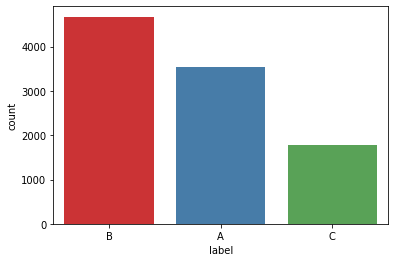

In [48]:
sns.countplot(x='label', data=df, palette = 'Set1')

#### Balancing the data

In [3]:
df = pd.read_csv('data/dataset_10000.csv')
df.head()

,length,width,height,label
0,7,7,49,B
1,20,13,75,B
2,29,2,81,A
3,15,6,39,A
4,11,9,71,B


In [5]:
a = df.label.value_counts()
a.iloc[-1]

1783

In [14]:
def balance_dataset(df):
    balanced_df = pd.DataFrame()
    n = df.label.value_counts().iloc[-1]
    for label in df.label.unique():
        lb_df = df[df.label==label]
        balanced_df = balanced_df.append(lb_df[:n])
    balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)
    return balanced_df

In [15]:
balanced_df = balance_dataset(df)
balanced_df.head()

,length,width,height,label
0,25,2,77,A
1,26,12,24,B
2,5,4,16,B
3,10,2,56,B
4,5,6,87,B


In [16]:
balanced_df.label.value_counts()

A    1783
C    1783
B    1783
Name: label, dtype: int64

In [18]:
balanced_df.tail()

,length,width,height,label
5344,22,4,96,A
5345,1,14,97,C
5346,23,3,66,A
5347,1,14,44,C
5348,1,14,31,C


In [21]:
save_dataset(balanced_df, 'balanced_dataset.csv')